# Linear Regressions

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical analysis
from scipy.stats import linregress

In [2]:
# read in data
df = pd.read_csv("../data/cleaned_vehicle_data.csv").set_index("VIN (1-10)")
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
VIN (1-10),,,,,,,,,,,
WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012


## Regression on both types of vehicles

The r-squared is: 0.00538442083209442


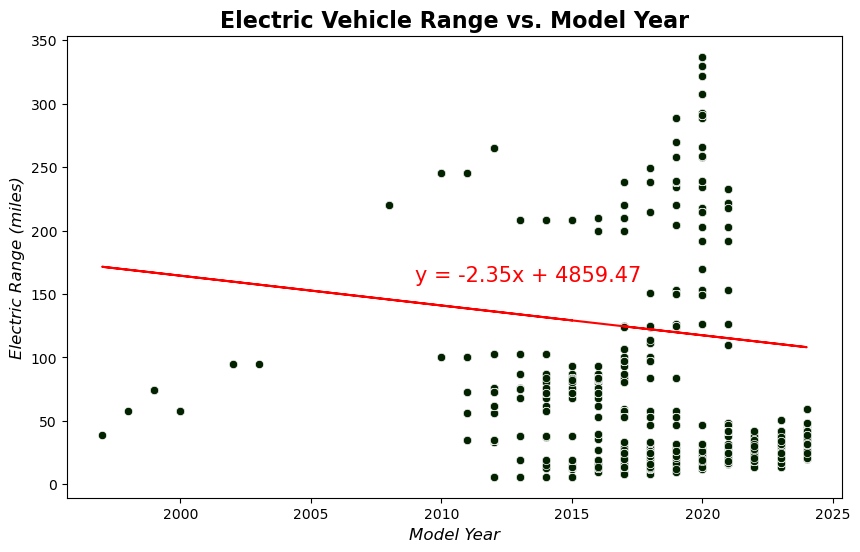

In [3]:
ranges = df["Electric Range"]
model_year = df["Model Year"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(model_year, ranges)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
regress_values = slope * model_year + intercept

plt.figure(figsize=(10, 6))

sns.scatterplot(x=model_year, y=ranges, color="#022200")
plt.plot(model_year, regress_values, "r-")

plt.title("Electric Vehicle Range vs. Model Year", fontsize=16, fontweight="bold")
plt.ylabel("Electric Range (miles)", fontsize=12, fontstyle="italic")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (2009, 160), fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

*There is a very slight negative correlation.* This is probably due to the large cluster of new hybrids.

In [4]:
# separate electric cars into hybrid and full electric
hybrid_df = df.loc[df["Electric Vehicle Type"].str.contains("PHEV")]
full_electric_df = df.loc[df["Electric Vehicle Type"].str.contains("BEV")]

## Regression on Plug-in Hybrids

The r-squared is: 0.0008103666038509397


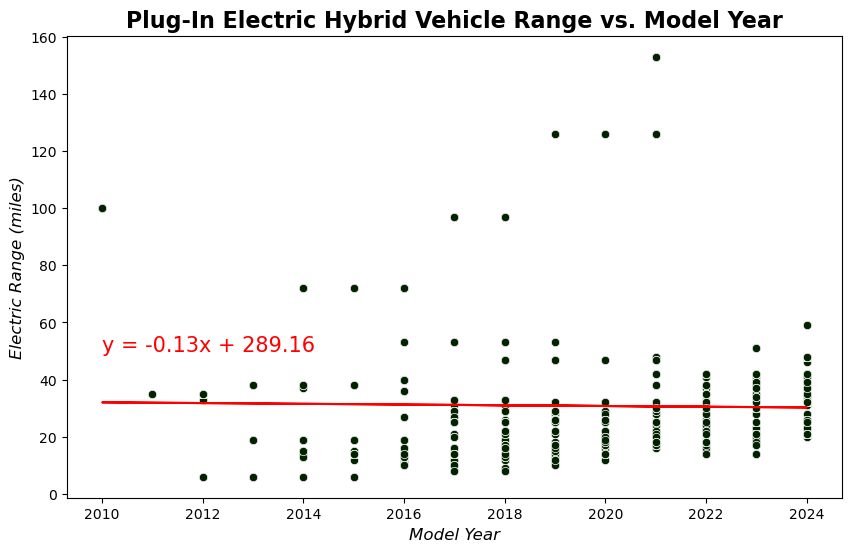

In [5]:
# plot hybrid vehicle range vs. model year with the regression line
hybrid_model_year = hybrid_df["Model Year"]
hybrid_range = hybrid_df["Electric Range"]

(hybrid_slope, hybrid_intercept, hybrid_rvalue, pvalue, stderr) = linregress(hybrid_model_year, hybrid_range)
hybrid_line_eq = f"y = {hybrid_slope:.2f}x + {hybrid_intercept:.2f}"
hybrid_regress_values = hybrid_slope * hybrid_model_year + hybrid_intercept

plt.figure(figsize=(10, 6))

sns.scatterplot(x=hybrid_model_year, y=hybrid_range, color="#022200")
plt.plot(hybrid_model_year, hybrid_regress_values, "r-")

plt.title("Plug-In Electric Hybrid Vehicle Range vs. Model Year", fontsize=16, fontweight="bold")
plt.ylabel("Electric Range (miles)", fontsize=12, fontstyle="italic")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")

plt.annotate(hybrid_line_eq, (2010, 50), fontsize=15, color="red")

print(f"The r-squared is: {hybrid_rvalue**2}")
plt.show()

*There is a very slight negative correlation.* This is probably because of the large number of new hybrids.

## Regression on Full Electric Vehicles

The r-squared is: 0.50164421530959


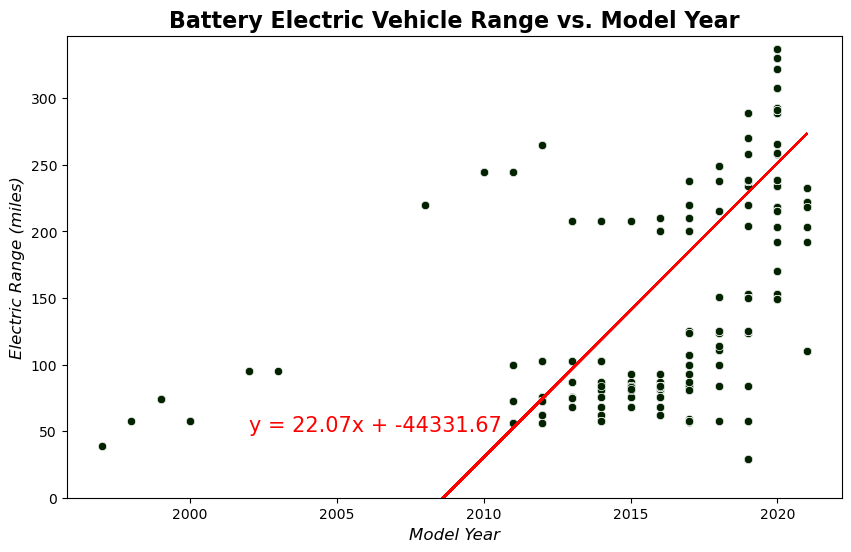

In [6]:
# plot full electric vehicle range vs. model year with the regression line

full_electric_model_year = full_electric_df["Model Year"]
full_electric_range = full_electric_df["Electric Range"]

(full_electric_slope, full_electric_intercept, full_electric_rvalue, pvalue, stderr) = linregress(full_electric_model_year, full_electric_range)
full_electric_line_eq = f"y = {full_electric_slope:.2f}x + {full_electric_intercept:.2f}"
full_electric_regress_values = full_electric_slope * full_electric_model_year + full_electric_intercept

plt.figure(figsize=(10, 6))

sns.scatterplot(x=full_electric_model_year, y=full_electric_range, color="#022200")
plt.plot(full_electric_model_year, full_electric_regress_values, "r-")

plt.title("Battery Electric Vehicle Range vs. Model Year", fontsize=16, fontweight="bold")
plt.ylabel("Electric Range (miles)", fontsize=12, fontstyle="italic")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylim(0, full_electric_range.max() + 10)

plt.annotate(full_electric_line_eq, (2002, 50), fontsize=15, color="red")

print(f"The r-squared is: {full_electric_rvalue**2}")
plt.show()

*There is a positive correlation.* This is probably due to the increase in sales and improving battery technology.